
This code imports libraries for data manipulation (pandas), machine learning (sklearn), and visualization (matplotlib) to build and evaluate a KNN classification model.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

 Loading the dataset

In [2]:
data = pd.read_csv('magic04.data',header=None)

This line filters the DataFrame to create two subsets for classes 'g' and 'h', and then randomly samples 6,688 instances from the 'g' subset.

In [3]:
g_unb=data[data[10]=='g']
h=data[data[10]=='h']
g=g_unb.sample(n=6688,random_state=42)

This line concatenates the sampled 'g' and 'h' DataFrames, shuffles the combined data randomly, and resets the index without adding the old index as a column

In [4]:
balanced=pd.concat([g,h]).sample(frac=1, random_state=42)
balanced.reset_index(drop=True)

,0,1,2,3,4,5,6,7,8,9,10
0,16.2152,13.0743,2.4553,0.5431,0.3064,-10.3789,-13.1290,-0.1040,45.8852,185.6668,h
1,13.1500,10.9523,2.1477,0.7687,0.3950,-14.8886,2.6711,11.8531,28.5530,192.1400,g
2,126.0560,35.5809,3.5832,0.2854,0.1441,-30.9713,-139.7062,-33.4830,16.0535,324.4922,h
3,29.5490,14.1175,2.3692,0.3590,0.1902,37.1775,19.8095,-8.8034,0.9098,145.2470,g
4,69.2540,34.3016,3.1916,0.1173,0.1132,-30.2818,73.8184,21.3775,24.9091,279.9318,h
...,...,...,...,...,...,...,...,...,...,...,...
13371,34.7228,13.3626,2.6191,0.4639,0.2368,-43.1927,13.5598,-5.3328,42.6660,130.7520,h
13372,23.8603,14.8311,2.4224,0.5104,0.2703,-9.5178,-12.7220,12.4322,0.5570,98.4508,g
13373,40.9787,17.3368,2.8582,0.3410,0.1823,38.1097,39.5081,-9.6327,16.1810,148.8410,g
13374,23.8026,10.1636,2.2625,0.5628,0.3087,32.1961,-16.3031,-9.6851,20.3915,108.5820,g


Defining the feature set by dropping the 10th column

In [5]:
x=balanced.drop(10,axis=1)
y=balanced[10]

Normalizing the features

In [6]:
scaler = StandardScaler()
x = scaler.fit_transform(x)


Splitting data into training, validation, and test sets

In [7]:
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.3,random_state=42)
x_validation,x_test,y_validation,y_test=train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)


This loop trains a KNN classifier for different values of k, predicts validation outcomes, and calculates accuracy, precision, recall, F1 score, and confusion matrix for each k

In [8]:
ks=[1,3,5,7,9,11]
results = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_validation)
    acc=accuracy_score(y_validation,y_pred)
    precision=precision_score(y_validation,y_pred,pos_label="g")
    recall=recall_score(y_validation,y_pred,pos_label="g")
    f1=f1_score(y_validation,y_pred,pos_label="g")
    cm=confusion_matrix(y_validation,y_pred)

    results.append({
        'k': k,
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm
    })


This lines finds the best k based on the highest F1 score from the results, then trains a KNN classifier with that k and makes predictions on the test set

In [9]:
best_k = max(results,key=lambda x: x['f1_score'])['k']
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(x_train, y_train)
y_pred_test = knn_best.predict(x_test)

This code calculates and prints the test set performance metrics (accuracy, precision, recall, F1 score, and confusion matrix) for the best k value determined earlier.

In [10]:
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, pos_label='g')
test_recall = recall_score(y_test, y_pred_test, pos_label='g')
test_f1 = f1_score(y_test, y_pred_test, pos_label='g')
test_cm = confusion_matrix(y_test, y_pred_test)
print(f"Best k value based on F1 score: {best_k}")
print(f"Test Set Metrics with Best k ({best_k}):")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print("Confusion Matrix:")
print(test_cm)

Best k value based on F1 score: 7
Test Set Metrics with Best k (7):
Accuracy: 0.8017
Precision: 0.7604
Recall: 0.8634
F1 Score: 0.8087
Confusion Matrix:
[[841 133]
 [265 768]]


This code prints the evaluation results (accuracy, precision, recall, F1 score, and confusion matrix) for each k value on the validation set

In [11]:

print("\nResults for each k value on Validation Set:")
for result in results:
    print(f"k={result['k']}, Accuracy={result['accuracy']:.4f}, Precision={result['precision']:.4f}, "
          f"Recall={result['recall']:.4f}, F1 Score={result['f1_score']:.4f}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print()


Results for each k value on Validation Set:
k=1, Accuracy=0.7841, Precision=0.7661, Recall=0.8174, F1 Score=0.7909
Confusion Matrix:
[[819 183]
 [250 754]]

k=3, Accuracy=0.8026, Precision=0.7725, Recall=0.8573, F1 Score=0.8127
Confusion Matrix:
[[859 143]
 [253 751]]

k=5, Accuracy=0.8001, Precision=0.7629, Recall=0.8703, F1 Score=0.8131
Confusion Matrix:
[[872 130]
 [271 733]]

k=7, Accuracy=0.8091, Precision=0.7670, Recall=0.8872, F1 Score=0.8228
Confusion Matrix:
[[889 113]
 [270 734]]

k=9, Accuracy=0.8026, Precision=0.7608, Recall=0.8822, F1 Score=0.8170
Confusion Matrix:
[[884 118]
 [278 726]]

k=11, Accuracy=0.8016, Precision=0.7608, Recall=0.8792, F1 Score=0.8157
Confusion Matrix:
[[881 121]
 [277 727]]



As k increases, accuracy peaks at k=5 before slightly declining, precision tends to rise, recall improves consistently, and F1 scores fluctuate minimally, suggesting that higher k values may enhance sensitivity without significantly sacrificing precision

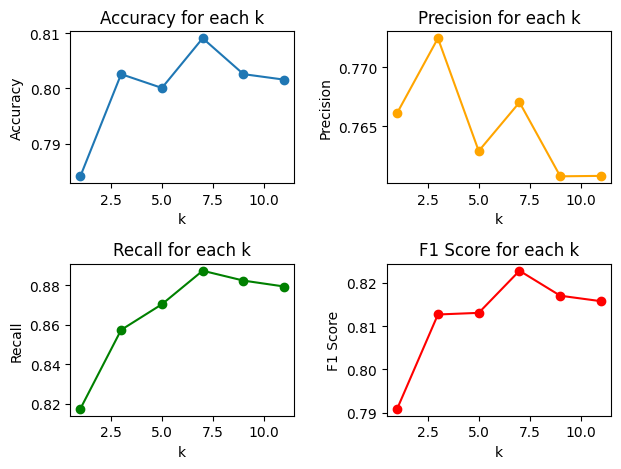

In [12]:

results_df = pd.DataFrame(results)
plt.subplot(2, 2, 1)
plt.plot(results_df['k'], results_df['accuracy'], marker='o')
plt.title('Accuracy for each k')
plt.xlabel('k')
plt.ylabel('Accuracy')

# Plot precision
plt.subplot(2, 2, 2)
plt.plot(results_df['k'], results_df['precision'], marker='o', color='orange')
plt.title('Precision for each k')
plt.xlabel('k')
plt.ylabel('Precision')

# Plot recall
plt.subplot(2, 2, 3)
plt.plot(results_df['k'], results_df['recall'], marker='o', color='green')
plt.title('Recall for each k')
plt.xlabel('k')
plt.ylabel('Recall')

# Plot F1 score
plt.subplot(2, 2, 4)
plt.plot(results_df['k'], results_df['f1_score'], marker='o', color='red')
plt.title('F1 Score for each k')
plt.xlabel('k')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()